# Project Introduction and Overview
## Objective:
Clean, analyse and explore Chicago crime data to identify patterns, trends and insights. 

## Data
The dataset source can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data) from the City of Chicago data repository. It is also included in the course resources folder for this section. It contains the following columns:
- ID: Unique identifier for the record
- Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident
- Date: Date when the incident occurred. this is sometimes a best estimate
- Block: The partially redacted address where the incident occurred, placing it on the same block as the actual address
- IUCR: The Illinois Unifrom Crime Reporting code
- Primary Type: The primary description of the IUCR code
- Description: The secondary description of the IUCR code, a subcategory of the primary description
- Location Description: Description of the location where the incident occurred
- Arrest: Indicates whether an arrest was made
- Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act
- Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car
- District: Indicates the police district where the incident occurred
- Ward: The ward (City Council district) where the incident occurred
- Community: Indicates the community area where the incident occurred
- FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS)
- X Coordinates: The x coordinate of the location where the incident occurred (partially redacted)
- Y Coordinates: The y coordinate of the location where the incident occurred (partially redacted)
- Year: Year the incident occurred
- Updated On: Date and time the record was last updated
- Latitude: The latitude of the location where the incident occurred (partially redacted)
- Longitude: The longitude of the location where the incident occurred (partially redacted)
- Location: The location where the incident occurred (partially redacted)

## Tasks

## Import Libraries and Dataset
1. Import required libraries
2. Import dataset
3. Data familiarisation


## Data Cleaning
You will ensure that your dataset is ready to explore/analyse by performing the following data cleaning and preparation activities:
1. Identify and deal with any missing values
2. Drop unneeded columns
3. Standardise and clean data types
4. Add columns where needed to improve dataset's 
5. Check for duplicates

## Exploratory Data Analysis (EDA)
You will use a mixture of graphical visualiastions/graphs and text-based methods to explore the dataset. General steps will include:
1. General questions
2. Identification of predominant crime types
3. Temporal analysis of crime distribution
   - Examine how crimes are distributed across months and days to find identify any patterns (if any)
4. Analyse arrest and domestic incident trends
5. Identify worst areas for crime


## Import Libraries and Dataset

**Import numpy, pandas, matplotlib and seaborn and set %matplotlib inline**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the 'chicago_crime' csv file into a dataframe called 'df'**

In [2]:
df = pd.read_csv('chicago_crime.csv')

**Check the head of the dataframe**

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13229983,JG447140,10/02/2023 00:01,107XX S STATE LINE RD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,10.0,52,7,1205119.0,1834444.0,2023,10/10/2023 15:42,41.700371,-87.524542,"(41.700371121, -87.524541776)"
1,13265845,JG490838,11/04/2023 00:30,106XX S STATE LINE RD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,10.0,52,7,1205117.0,1834954.0,2023,11/12/2023 15:41,41.701771,-87.524532,"(41.701770652, -87.524531562)"
2,13035173,JG214909,04/07/2023 22:00,111XX S STATE LINE RD,498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,False,True,...,10.0,52,04B,1205114.0,1831776.0,2023,08/19/2023 03:40:26 PM,41.693050,-87.524652,"(41.693050045, -87.524651806)"
3,12938918,JG100666,01/01/2023 10:30,111XX S STATE LINE RD,560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,10.0,52,08A,1205114.0,1831776.0,2023,08/19/2023 03:40:26 PM,41.693050,-87.524652,"(41.693050045, -87.524651806)"
4,13172991,JG379398,08/12/2023 04:35,111XX S STATE LINE RD,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,10.0,52,08B,1205114.0,1831708.0,2023,08/19/2023 03:41:54 PM,41.692863,-87.524654,"(41.692863447, -87.524654143)"


**Check the info of the dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250979 entries, 0 to 250978
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    250979 non-null  int64  
 1   Case Number           250979 non-null  object 
 2   Date                  250979 non-null  object 
 3   Block                 250979 non-null  object 
 4   IUCR                  250979 non-null  object 
 5   Primary Type          250979 non-null  object 
 6   Description           250979 non-null  object 
 7   Location Description  249840 non-null  object 
 8   Arrest                250979 non-null  bool   
 9   Domestic              250979 non-null  bool   
 10  Beat                  250979 non-null  int64  
 11  District              250979 non-null  int64  
 12  Ward                  250976 non-null  float64
 13  Community Area        250979 non-null  int64  
 14  FBI Code              250979 non-null  object 
 15  

**Use describe to get a summary of the dataset**

In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.509790e+05,250979.000000,250979.000000,250976.000000,250979.000000,2.509440e+05,2.509440e+05,250979.0,250944.000000,250944.000000
mean,1.309647e+07,1154.902661,11.319692,23.119310,36.284956,1.165344e+06,1.887322e+06,2023.0,41.846392,-87.668729
std,6.550225e+05,712.004601,7.116028,14.007076,21.561272,1.633514e+04,3.171172e+04,0.0,0.087206,0.059472
min,2.727900e+04,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.813897e+06,2023.0,41.644590,-87.939733
25%,1.303500e+07,533.000000,5.000000,10.000000,22.000000,1.153943e+06,1.859886e+06,2023.0,41.770805,-87.710248
50%,1.312914e+07,1032.000000,10.000000,23.000000,32.000000,1.167101e+06,1.893519e+06,2023.0,41.863469,-87.662181
75%,1.322142e+07,1732.000000,17.000000,34.000000,53.000000,1.176796e+06,1.910368e+06,2023.0,41.909895,-87.626773
max,1.331905e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951506e+06,2023.0,42.022549,-87.524532


**Check the dtypes of our dataframe**

In [6]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

## Data Cleaning and Preparation

### Handle Missing Values

**Combine isna() and sum() to look at how many null values we have in our dataset**

In [7]:
df.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1139
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       3
Community Area             0
FBI Code                   0
X Coordinate              35
Y Coordinate              35
Year                       0
Updated On                 0
Latitude                  35
Longitude                 35
Location                  35
dtype: int64

**Drop missing / na rows from our dataset**

As the missing values here are categorical we can't impute them with mean or median etc. As they make up such a small percent of our total dataset, in this case we will drop them.

In [8]:
df.dropna(inplace=True)

**Use isna() and sum() to verify no null values**

In [9]:
df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

### Standardise and Clean Data Types

**Change Date column to datetime dtype**

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Date']

0        2023-10-02 00:01:00
1        2023-11-04 00:30:00
2        2023-04-07 22:00:00
3        2023-01-01 10:30:00
4        2023-08-12 04:35:00
                 ...        
250939   2023-03-07 05:30:00
250940   2023-10-10 20:30:00
250941   2023-11-01 09:50:00
250942   2023-01-04 10:25:00
250943   2023-03-29 05:30:00
Name: Date, Length: 249802, dtype: datetime64[ns]

### Add Columns

**Create a new 'Month' column which extracts the month from the 'Date' column**

In [12]:
df['Month'] = df['Date'].dt.month

In [13]:
df[['Date','Month']].head()

,Date,Month
0,2023-10-02 00:01:00,10
1,2023-11-04 00:30:00,11
2,2023-04-07 22:00:00,4
3,2023-01-01 10:30:00,1
4,2023-08-12 04:35:00,8


**Create a new 'Hour' column which extracts the hour from the 'Date' column**

In [14]:
df['Hour'] = df['Date'].dt.hour

In [15]:
df[['Date','Hour']].head()

,Date,Hour
0,2023-10-02 00:01:00,0
1,2023-11-04 00:30:00,0
2,2023-04-07 22:00:00,22
3,2023-01-01 10:30:00,10
4,2023-08-12 04:35:00,4


**Create a new 'Day of Week' column which extracts the day of the week from the 'Date' column**

In [18]:
df['Day of Week'] = df['Date'].dt.dayofweek

In [19]:
df[['Date','Day of Week']].head()

,Date,Day of Week
0,2023-10-02 00:01:00,0
1,2023-11-04 00:30:00,5
2,2023-04-07 22:00:00,4
3,2023-01-01 10:30:00,6
4,2023-08-12 04:35:00,5


**Use the provided dictionary to *map* the day of week number to its name**

In [21]:
# Create the dictionary
day_of_week_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map the dictionary to the 'Day of Week' column
df['Day of Week'] = df['Day of Week'].map(day_of_week_dict)


In [22]:
df[['Date','Day of Week']].head()

,Date,Day of Week
0,2023-10-02 00:01:00,Monday
1,2023-11-04 00:30:00,Saturday
2,2023-04-07 22:00:00,Friday
3,2023-01-01 10:30:00,Sunday
4,2023-08-12 04:35:00,Saturday


### Drop Unneeded Columns

**Drop 'Updated On' column**

In [23]:
df.drop('Updated On', axis=1, inplace=True)

### Check for Duplicates

**Check for duplicates by indexing the dataframe using the .duplicated() method**

In [24]:
df[df.duplicated()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Hour,Day of Week


## Exploratory Data Analysis


### Initial Questions

**Which 5 districts had the most crime?**

In [25]:
df['District'].value_counts().head()

District
8     16215
12    15127
6     15079
4     14331
11    13727
Name: count, dtype: int64

**Which 3 months have had the most crime?**

In [26]:
df['Month'].value_counts().head(3)

Month
8     23869
7     23731
10    22638
Name: count, dtype: int64

**How many unique locations have there been? (*Block* column)**

In [27]:
df['Block'].nunique()

28375

**How does this compare to the total number of reported crimes?**

In [28]:
df['Block'].count()

np.int64(249802)

In [29]:
len(df)

249802

### Predominant Crime Types

**What are the top 5 types of crime in Chicago?**

In [30]:
df['Primary Type'].value_counts().head()

Primary Type
THEFT                  54834
BATTERY                42614
CRIMINAL DAMAGE        28960
MOTOR VEHICLE THEFT    28219
ASSAULT                21778
Name: count, dtype: int64

**Use a countplot to visualise this**

C:\Users\jundi\AppData\Local\Temp\ipykernel_3812\3438836329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Primary Type', data=df, palette='viridis', order=order)


Text(0.5, 1.0, 'Top 5 Crime Types')

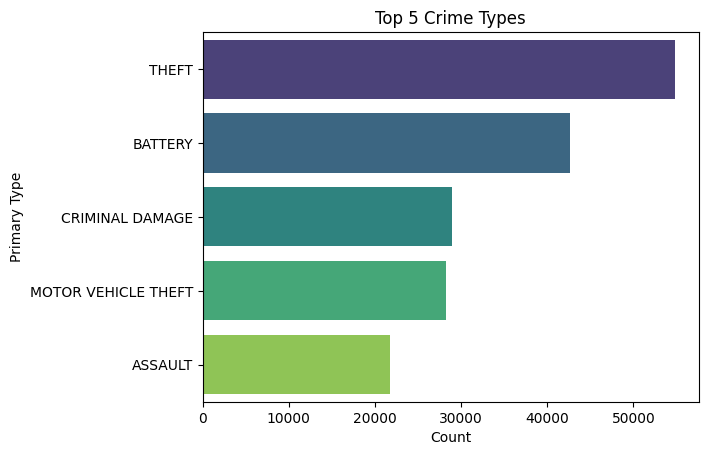

In [33]:
order = df['Primary Type'].value_counts().head().index
sns.countplot(y='Primary Type', data=df, palette='viridis', order=order)
plt.xlabel('Count')
plt.title('Top 5 Crime Types')

### Temporal Analysis of Crime Distribution

**Create a groupby object called 'countByMonth'. Group the dataframe by the month column and use the size() method to aggregate the data.**

In [34]:
countByMonth = df.groupby('Month').size().reset_index(name='Crime Count')
countByMonth

,Month,Crime Count
0,1,20920
1,2,18265
2,3,20543
3,4,20531
4,5,22009
5,6,22467
6,7,23731
7,8,23869
8,9,22268
9,10,22638


**Create a linechart to show crime by month**

<Axes: xlabel='Month', ylabel='Crime Count'>

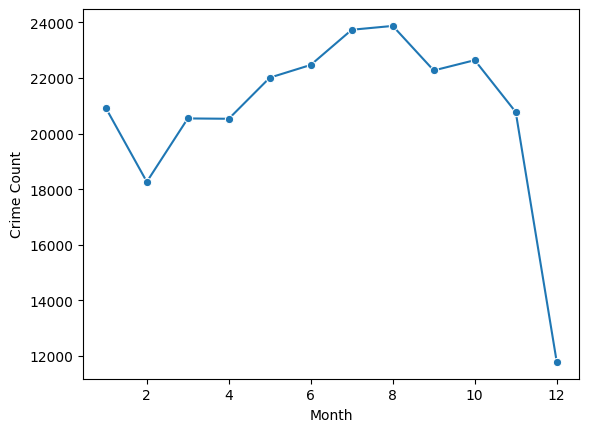

In [35]:
sns.lineplot(x='Month', y='Crime Count', data=countByMonth, marker='o')

**Create a count plot to show crime by day, broken down / split by the domestic column. Use the provided list to set the correct order for days.**

<Axes: xlabel='Day of Week', ylabel='count'>

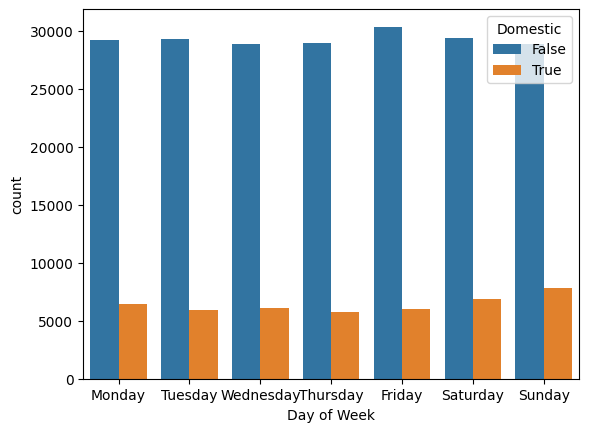

In [36]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day of Week', data=df, order=day_order, hue=df['Domestic'].astype(str))

**Create a histplot to show the most common hour for crime. Set bins to be equal to 24 and xticklabels to also be true.**

Text(0.5, 1.0, 'Number of Crimes by Hour')

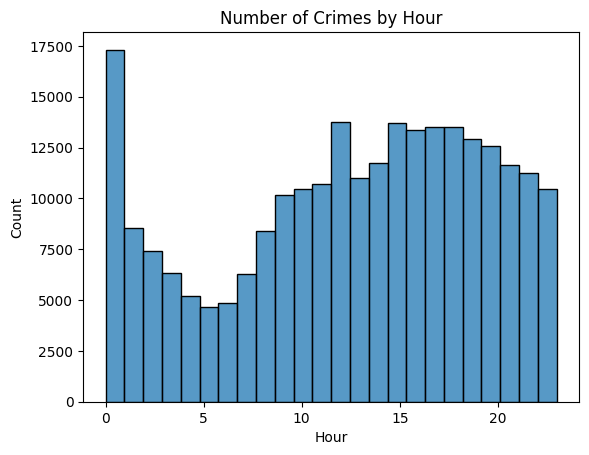

In [37]:
sns.histplot(data=df, x='Hour', bins=24)
plt.title('Number of Crimes by Hour')

### Analyse Arrest and Domestic Incidents

**Create a count plot of arrests vs non-arrests**

C:\Users\jundi\AppData\Local\Temp\ipykernel_3812\2208796287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Arrest', palette='viridis')


<Axes: xlabel='Arrest', ylabel='count'>

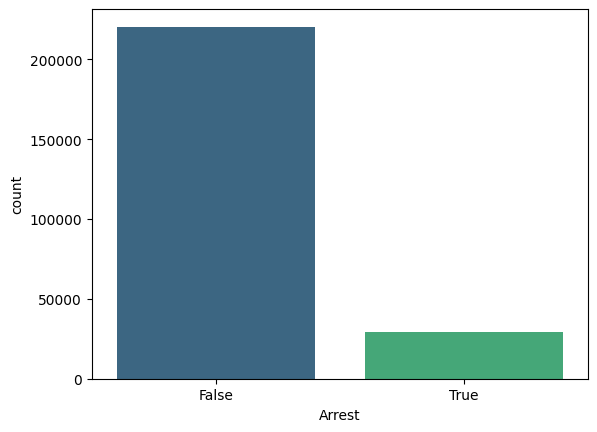

In [38]:
sns.countplot(data=df, x='Arrest', palette='viridis')

**Create a count plot of domestic vs non-domestic indidents**

C:\Users\jundi\AppData\Local\Temp\ipykernel_3812\3383206969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Domestic', palette='viridis')


<Axes: xlabel='Domestic', ylabel='count'>

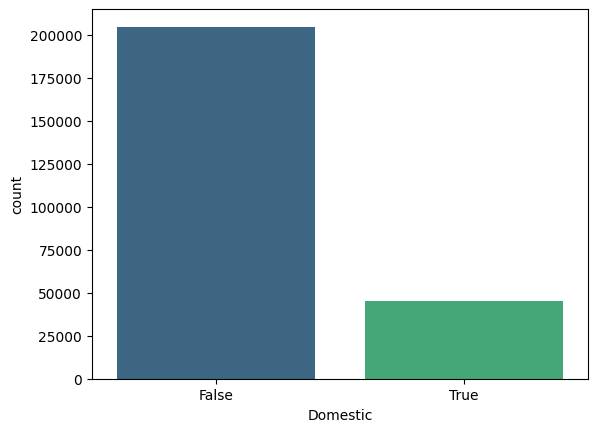

In [39]:
sns.countplot(data=df, x='Domestic', palette='viridis')

**Create a count plot to show the number of arrests for each type of crime.**

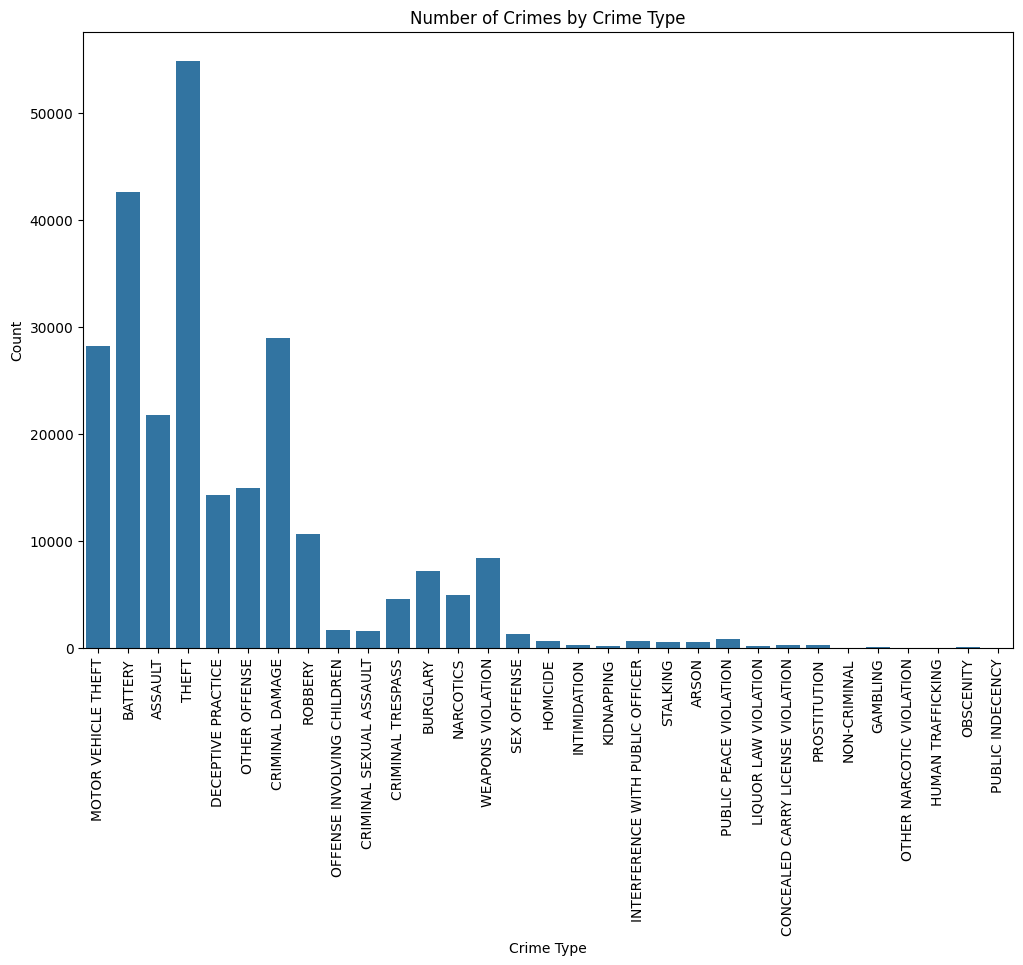

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Primary Type')

plt.title('Number of Crimes by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

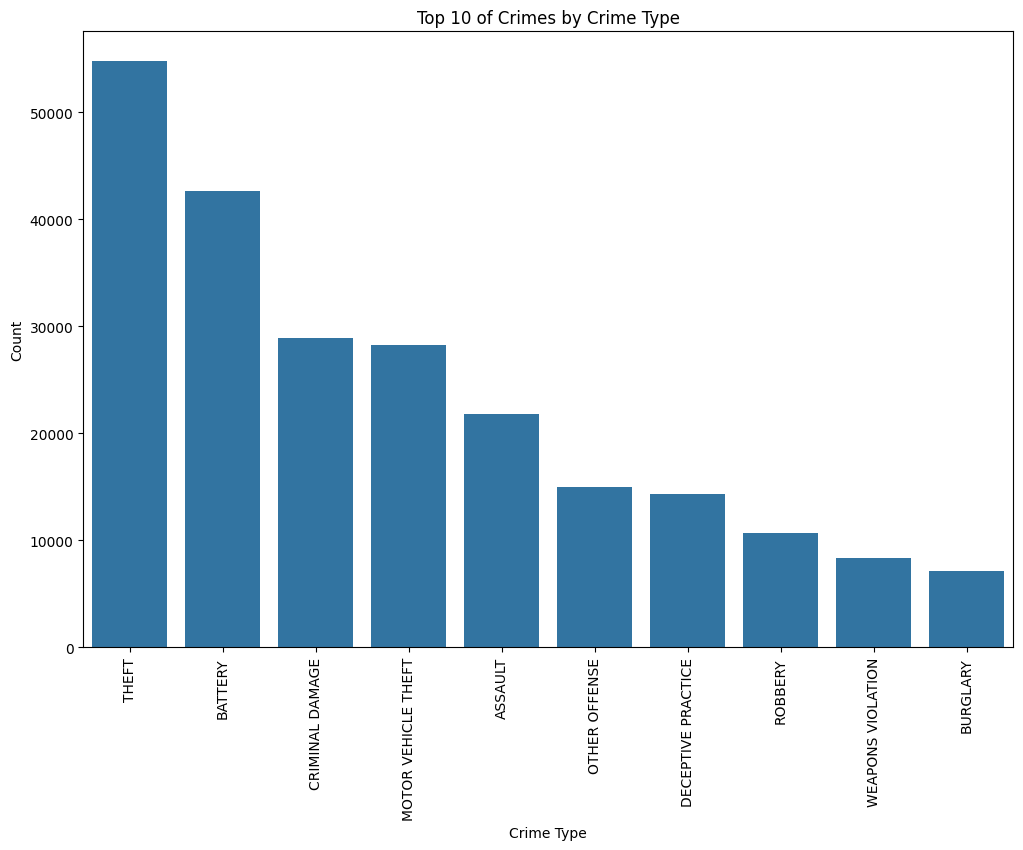

In [45]:
plt.figure(figsize=(12,8))
top_ten = df['Primary Type'].value_counts().head(10).index
sns.countplot(data=df, x='Primary Type', order=top_ten)

plt.title('Top 10 of Crimes by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90);